In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [2]:
# import the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


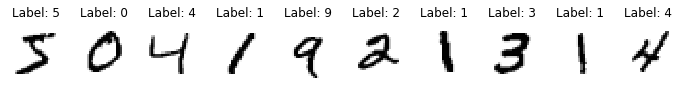

In [3]:
# Example of the input data
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(12, 3))
for ax, image, label in zip(axes, x_train[:10], y_train[:10]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label: %i" % label)

In [4]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.16666, random_state=42, stratify=y_train)

In [6]:
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

In [7]:
x_val.shape

(10000, 784)

In [8]:
input_layer = layers.Input(shape=(784,))

In [9]:
lambda_L = 1e-5

hidden_layer = layers.Dense(512, activation = 'tanh', kernel_regularizer=keras.regularizers.L1(lambda_L))(input_layer)
hidden_layer = layers.Dropout(0.1)(hidden_layer)

hidden_layer = layers.Dense(256, activation = 'tanh', kernel_regularizer=keras.regularizers.L1(lambda_L))(hidden_layer)
hidden_layer = layers.Dropout(0.1)(hidden_layer)

hidden_layer = layers.Dense(128, activation = 'tanh', kernel_regularizer=keras.regularizers.L1(lambda_L))(hidden_layer)
hidden_layer = layers.Dropout(0.1)(hidden_layer)

hidden_layer = layers.Dense(64, activation = 'tanh', kernel_regularizer=keras.regularizers.L1(lambda_L))(hidden_layer)
hidden_layer = layers.Dropout(0.1)(hidden_layer)

hidden_layer = layers.Dense(32, activation = 'tanh', kernel_regularizer=keras.regularizers.L1(lambda_L))(hidden_layer)
hidden_layer = layers.Dropout(0.1)(hidden_layer)

In [10]:
output_layer = layers.Dense(10, activation='softmax')(hidden_layer)

In [11]:
model = keras.Model(inputs = input_layer, outputs = output_layer)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0     

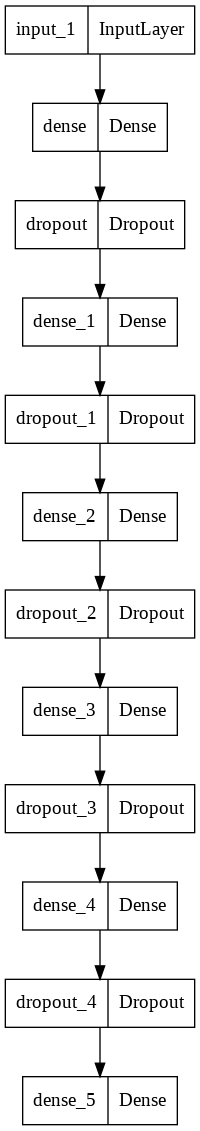

In [13]:
tf.keras.utils.plot_model(model)

In [14]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss=keras.losses.SparseCategoricalCrossentropy(), metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [15]:
earlyStop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

In [16]:
history = model.fit(x=x_train, y=y_train, batch_size=2048 , epochs=1000, callbacks=[earlyStop], validation_data=(x_val, y_val))

Epoch 1/1000
25/25 [==============================] - 9s 277ms/step - loss: 1.3067 - sparse_categorical_accuracy: 0.6969 - val_loss: 0.7457 - val_sparse_categorical_accuracy: 0.8768
Epoch 2/1000
25/25 [==============================] - 7s 263ms/step - loss: 0.6966 - sparse_categorical_accuracy: 0.8820 - val_loss: 0.5487 - val_sparse_categorical_accuracy: 0.9054
Epoch 3/1000
25/25 [==============================] - 7s 285ms/step - loss: 0.5492 - sparse_categorical_accuracy: 0.9087 - val_loss: 0.4619 - val_sparse_categorical_accuracy: 0.9226
Epoch 4/1000
25/25 [==============================] - 7s 265ms/step - loss: 0.4760 - sparse_categorical_accuracy: 0.9230 - val_loss: 0.4225 - val_sparse_categorical_accuracy: 0.9328
Epoch 5/1000
25/25 [==============================] - 4s 164ms/step - loss: 0.4323 - sparse_categorical_accuracy: 0.9311 - val_loss: 0.3951 - val_sparse_categorical_accuracy: 0.9387
Epoch 6/1000
25/25 [==============================] - 3s 139ms/step - loss: 0.4011 - spars

In [17]:
model.save('model.h5')

In [18]:
model.save_weights('weight.h5')

In [19]:
y_predicted = model.predict(x_test)
y_predicted

array([[3.88475954e-08, 1.56746296e-07, 3.17274896e-07, ...,
        9.99996066e-01, 8.00122990e-08, 1.97990698e-06],
       [6.53062500e-07, 2.29303691e-06, 9.99994636e-01, ...,
        3.25926607e-07, 3.58047743e-07, 5.16896836e-09],
       [1.45028167e-07, 9.99998093e-01, 5.78871436e-07, ...,
        6.24133577e-07, 5.18929653e-07, 1.47411159e-08],
       ...,
       [9.31813346e-08, 2.15933611e-07, 1.52456735e-07, ...,
        1.93594119e-07, 2.03778441e-07, 7.58448778e-06],
       [3.25338704e-07, 7.58744534e-08, 5.84957398e-08, ...,
        1.09701695e-07, 9.60801935e-06, 5.71736116e-08],
       [3.68326852e-07, 1.73207244e-08, 8.71715713e-08, ...,
        1.98347259e-08, 3.73793682e-07, 1.92848528e-08]], dtype=float32)

In [20]:
y_pred = y_predicted.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.98      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [22]:
incorrect = np.where(y_pred != y_test)
x_wrong = []
y_wrong = []
y_expected = []
for i in incorrect[0]:
  x_wrong.append(x_test[i])
  y_wrong.append(y_pred[i])
  y_expected.append(y_test[i])

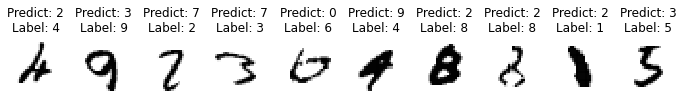

In [23]:
# Example of the incorrect predicted data
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(12, 3))
for ax, image, predict, label in zip(axes, x_wrong[:10], y_wrong[:10], y_expected[:10]):
  ax.set_axis_off()
  ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Predict: %i" % predict + "\nLabel: %i" % label)

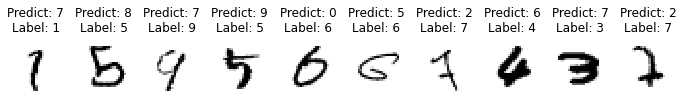

In [24]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(12, 3))
for ax, image, predict, label in zip(axes, x_wrong[11:21], y_wrong[11:21], y_expected[11:21]):
  ax.set_axis_off()
  ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Predict: %i" % predict + "\nLabel: %i" % label)

In [25]:
confusion_matrix(y_test, y_pred)

array([[ 976,    0,    1,    0,    0,    0,    0,    1,    1,    1],
       [   0, 1128,    1,    1,    0,    1,    2,    2,    0,    0],
       [   2,    0, 1020,    4,    1,    0,    1,    2,    2,    0],
       [   0,    1,    2,  997,    0,    0,    0,    7,    2,    1],
       [   0,    0,    2,    0,  968,    0,    3,    4,    0,    5],
       [   3,    0,    0,    9,    0,  867,    7,    1,    2,    3],
       [   5,    1,    1,    1,    2,    3,  945,    0,    0,    0],
       [   1,    0,    8,    2,    0,    0,    0, 1014,    0,    3],
       [   3,    0,    3,    1,    0,    1,    1,    2,  961,    2],
       [   2,    2,    0,    5,   10,    2,    0,    7,    5,  976]])